In [1]:
# Import Libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ObesityDataSet.csv')

In [3]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


Dari data di atas, dapat diketahui tentang datasetnya beserta informasi fitur dan targetnya.

| Fitur                                 | Deskripsi                                                                                       |
| ------------------------------------- | ----------------------------------------------------------------------------------------------- |
| **Age**                               | Umur responden (dalam tahun)                                                                    |
| **Gender**                            | Jenis kelamin (`Male`, `Female`)                                                                |
| **Height**                            | Tinggi badan (dalam meter)                                                                      |
| **Weight**                            | Berat badan (dalam kg)                                                                          |
| **CALC**                              | Seberapa sering minum alkohol (kategori: `no`, `Sometimes`, `Frequently`, `Always`)             |
| **FAVC**                              | Apakah sering mengonsumsi makanan tinggi kalori? (`yes` / `no`)                                 |
| **FCVC**                              | Frekuensi konsumsi sayuran dalam setiap makan (skala 1–3, makin besar makin sehat)              |
| **NCP**                               | Jumlah kali makan dalam sehari (Number of meals per day)                                        |
| **SCC**                               | Apakah kamu mengikuti saran dari ahli gizi? (`yes` / `no`)                                      |
| **SMOKE**                             | Apakah merokok? (`yes` / `no`)                                                                  |
| **CH2O**                              | Konsumsi air putih per hari (skala 1–3)                                                         |
| **family\_history\_with\_overweight** | Riwayat keluarga dengan kelebihan berat badan? (`yes` / `no`)                                   |
| **FAF**                               | Aktivitas fisik mingguan dalam jam (Physical activity frequency)                                |
| **TUE**                               | Waktu yang dihabiskan di depan layar (TV, komputer, hp) per hari (skala jam)                    |
| **CAEC**                              | Frekuensi makan camilan (kategori: `no`, `Sometimes`, `Frequently`, `Always`)                   |
| **MTRANS**                            | Moda transportasi utama (`Automobile`, `Motorbike`, `Bike`, `Public_Transportation`, `Walking`) |



| Target                                | Deskripsi                                                                                       |
| ------------------------------------- | ----------------------------------------------------------------------------------------------- |
| **NObeyesdad**                        | Kategori status berat badan / obesitas. Contoh nilai: `Insufficient_Weight`, `Normal_Weight`, `Overweight_Level_I`, `Overweight_Level_II`, `Obesity_Type_I`, `Obesity_Type_II`, `Obesity_Type_III` |

In [4]:
df.shape

(2111, 17)

Dataset ini memiliki 2111 rows dan 17 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

Berdasarkan informasi di atas dapat diketahui bahwa semua fitur bertipe data sama yaitu categorical. Jadi ada beberapa yang harus diubah menjadi numerical

In [6]:
df.nunique()

Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC                                  3
SMOKE                                3
CH2O                              1263
family_history_with_overweight       3
FAF                               1186
TUE                               1130
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64

In [7]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: Age
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Column: Gender
['Female' 'Male' '?' nan]

Column: Height
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Column: Weight
['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Column: CALC
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

Column: FAVC
['no' 'yes' '?' nan]

Column: FCVC
['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448'
 '1.344854' '2.959658' '2.725282' '2.844607' '2.44004' '2.432302'
 '2.592247' '2.449267' '2.929889' '2.015258' '1.031149' '1.592183'
 '1.21498' '1.522001' '2.703436' '2.362918' '2.14084' '2.5596' '2.336044'
 '1.813234' '2.724285' '2.71897' '1.133844' '1.757466' '2.979383'
 '2.20491

In [8]:
df.isnull().sum()

Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Berdasarkan nilai unik, diketahui bahwa terdapat nilai '?' yang mana merupakan nilai kosong. Jadi nilai tersebut harus diubah menjadi nilai kosong terlebih dahulu.

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Length: 2111, dtype: bool

Terdapat banyak data duplikat, jadi harus dihapus

Sebelum memasuki imbalanced data dan outlier, harus menangani missing values dan duplicate data terlebih dahulu.

In [10]:
df.drop_duplicates()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.71073,131.408528,Sometimes,yes,3,3,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3,3,no,no,2.00513,yes,1.34139,0.59927,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3,3,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.73945,133.346641,Sometimes,yes,3,3,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Duplicate data sudah ditangani. Dari 2111 rows menjadi 2093 rows, 18 rows dihapus.

In [11]:
df = df.replace('?', np.nan)

In [12]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: Age
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Column: Gender
['Female' 'Male' nan]

Column: Height
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Column: Weight
['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Column: CALC
['no' 'Sometimes' 'Frequently' nan 'Always']

Column: FAVC
['no' 'yes' nan]

Column: FCVC
['2' '3' '1' nan '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448'
 '1.344854' '2.959658' '2.725282' '2.844607' '2.44004' '2.432302'
 '2.592247' '2.449267' '2.929889' '2.015258' '1.031149' '1.592183'
 '1.21498' '1.522001' '2.703436' '2.362918' '2.14084' '2.5596' '2.336044'
 '1.813234' '2.724285' '2.71897' '1.133844' '1.757466' '2.979383'
 '2.204914' '2.927218' '2

In [13]:
df.isnull().sum()

Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64

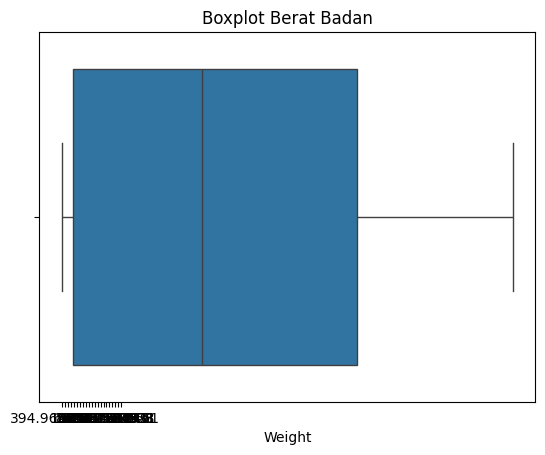

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Weight'])
plt.title("Boxplot Berat Badan")

# Atur ticks ke nilai puluhan saja
plt.xticks(ticks=range(0, 201, 10))  # dari 0 sampai 200 dengan kelipatan 10

plt.show()